In [100]:
# Install the required libraries
# !pip install prophet

In [101]:
# Import the required libraries and dependencies

import pandas as pd
from prophet import Prophet
import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt


In [102]:
# Read the 5 .csv files as DataFrames, with the first date as index
# Name them AAPL, COMP, GOOGL, MSFT and SPX

msft_df = pd.read_csv('Resources/MSFT-5-yrs.csv',
                 index_col="Date",
                 parse_dates=True
                 )

aapl_df = pd.read_csv('Resources/AAPL-5-yrs.csv',
                 index_col="Date",
                 parse_dates=True
                 )

googl_df = pd.read_csv('Resources/GOOGL-5-yrs.csv',
                 index_col="Date",
                 parse_dates=True
                 )

comp_df = pd.read_csv('Resources/COMP-5-yrs.csv',
                 index_col="Date",
                 parse_dates=True
                 )

spx_df = pd.read_csv('Resources/SPX-5-yrs.csv',
                 index_col="Date",
                 parse_dates=True
                 )

In [103]:
# Preview all 5 datasets to ensure that all column names match

display(msft_df.head(), aapl_df.head(), googl_df.head(), comp_df.head(), spx_df.head())

# One of the interesting things to note is that the way that the file came down is that the latest date is ontop of the file

,Close/Last,Volume,Open,High,Low
Date,,,,,
2024-10-08,$414.71,19229260,$410.90,$415.66,$408.17
2024-10-07,$409.54,20919760,$416.00,$417.11,$409.00
2024-10-04,$416.06,19190910,$418.24,$419.75,$414.97
2024-10-03,$416.54,13686420,$417.63,$419.55,$414.29
2024-10-02,$417.13,16582260,$422.58,$422.82,$416.71


,Close/Last,Volume,Open,High,Low
Date,,,,,
2024-10-08,$225.77,31855690,$224.30,$225.98,$223.25
2024-10-07,$221.69,39505350,$224.50,$225.69,$221.33
2024-10-04,$226.80,37345100,$227.90,$228.00,$224.13
2024-10-03,$225.67,34044160,$225.14,$226.805,$223.32
2024-10-02,$226.78,32880610,$225.89,$227.37,$223.02


,Close/Last,Volume,Open,High,Low
Date,,,,,
2024-10-08,$164.38,23072730,$163.94,$164.725,$162.87
2024-10-07,$162.98,22463140,$167.72,$168.48,$162.75
2024-10-04,$167.06,19093720,$168.06,$168.23,$165.48
2024-10-03,$165.86,15073100,$164.41,$166.64,$163.923
2024-10-02,$165.86,17760180,$166.42,$167.52,$164.73


,Close/Last,Open,High,Low
Date,,,,
2024-10-07,17923.90,18080.11,18096.33,17900.04
2024-10-04,18137.85,18130.42,18145.28,17952.30
2024-10-03,17918.48,17859.49,18011.25,17826.42
2024-10-02,17925.12,17867.12,17978.57,17767.79
2024-10-01,17910.36,18154.94,18162.72,17779.77


,Close/Last,Open,High,Low
Date,,,,
2024-10-07,5695.94,5737.80,5739.34,5686.85
2024-10-04,5751.07,5737.48,5753.21,5702.83
2024-10-03,5699.94,5698.19,5718.78,5677.37
2024-10-02,5709.54,5698.14,5719.63,5674.00
2024-10-01,5708.75,5757.73,5757.73,5681.28


In [104]:
# Explore and understand the 5 DataFrames - data types and null values

msft_df.info()
aapl_df.info()
googl_df.info()
comp_df.info()
spx_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2024-10-08 to 2019-10-08
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Close/Last  1259 non-null   object
 1   Volume      1259 non-null   int64 
 2   Open        1259 non-null   object
 3   High        1259 non-null   object
 4   Low         1259 non-null   object
dtypes: int64(1), object(4)
memory usage: 59.0+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2024-10-08 to 2019-10-08
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Close/Last  1259 non-null   object
 1   Volume      1259 non-null   int64 
 2   Open        1259 non-null   object
 3   High        1259 non-null   object
 4   Low         1259 non-null   object
dtypes: int64(1), object(4)
memory usage: 59.0+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2024-10-08 to 2019-10-0

In [105]:
# Rename Close/Last column to company_close

msft_df = msft_df.rename(columns={'Close/Last': 'msft_close'})
aapl_df = aapl_df.rename(columns={'Close/Last': 'aapl_close'})
googl_df = googl_df.rename(columns={'Close/Last': 'googl_close'})
comp_df = comp_df.rename(columns={'Close/Last': 'comp_close'})
spx_df = spx_df.rename(columns={'Close/Last': 'spx_close'})
#
display(msft_df.head(), aapl_df.head(), googl_df.head(), comp_df.head(), spx_df.head())


,msft_close,Volume,Open,High,Low
Date,,,,,
2024-10-08,$414.71,19229260,$410.90,$415.66,$408.17
2024-10-07,$409.54,20919760,$416.00,$417.11,$409.00
2024-10-04,$416.06,19190910,$418.24,$419.75,$414.97
2024-10-03,$416.54,13686420,$417.63,$419.55,$414.29
2024-10-02,$417.13,16582260,$422.58,$422.82,$416.71


,aapl_close,Volume,Open,High,Low
Date,,,,,
2024-10-08,$225.77,31855690,$224.30,$225.98,$223.25
2024-10-07,$221.69,39505350,$224.50,$225.69,$221.33
2024-10-04,$226.80,37345100,$227.90,$228.00,$224.13
2024-10-03,$225.67,34044160,$225.14,$226.805,$223.32
2024-10-02,$226.78,32880610,$225.89,$227.37,$223.02


,googl_close,Volume,Open,High,Low
Date,,,,,
2024-10-08,$164.38,23072730,$163.94,$164.725,$162.87
2024-10-07,$162.98,22463140,$167.72,$168.48,$162.75
2024-10-04,$167.06,19093720,$168.06,$168.23,$165.48
2024-10-03,$165.86,15073100,$164.41,$166.64,$163.923
2024-10-02,$165.86,17760180,$166.42,$167.52,$164.73


,comp_close,Open,High,Low
Date,,,,
2024-10-07,17923.90,18080.11,18096.33,17900.04
2024-10-04,18137.85,18130.42,18145.28,17952.30
2024-10-03,17918.48,17859.49,18011.25,17826.42
2024-10-02,17925.12,17867.12,17978.57,17767.79
2024-10-01,17910.36,18154.94,18162.72,17779.77


,spx_close,Open,High,Low
Date,,,,
2024-10-07,5695.94,5737.80,5739.34,5686.85
2024-10-04,5751.07,5737.48,5753.21,5702.83
2024-10-03,5699.94,5698.19,5718.78,5677.37
2024-10-02,5709.54,5698.14,5719.63,5674.00
2024-10-01,5708.75,5757.73,5757.73,5681.28


In [106]:
# Merge the Dataframes into one - call it merged_df

merged_df = pd.concat([msft_df['msft_close'], aapl_df['aapl_close'], googl_df['googl_close'], comp_df['comp_close'], spx_df['spx_close']], axis=1).dropna()

In [107]:
# Preview the merged df; look at info

display(merged_df.head(), merged_df.tail(), merged_df.info())

# Please see the previous point, after the merge the dates in head are the oldest dates

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-10-08 to 2024-10-07
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   msft_close   1258 non-null   object 
 1   aapl_close   1258 non-null   object 
 2   googl_close  1258 non-null   object 
 3   comp_close   1258 non-null   float64
 4   spx_close    1258 non-null   float64
dtypes: float64(2), object(3)
memory usage: 59.0+ KB


,msft_close,aapl_close,googl_close,comp_close,spx_close
Date,,,,,
2019-10-08,$135.67,$56.10,$59.5065,7823.78,2893.06
2019-10-09,$138.24,$56.7575,$60.12,7903.74,2919.40
2019-10-10,$139.10,$57.5225,$60.4735,7950.78,2938.13
2019-10-11,$139.68,$59.0525,$60.7855,8057.04,2970.27
2019-10-14,$139.55,$58.9675,$60.8885,8048.65,2966.15


,msft_close,aapl_close,googl_close,comp_close,spx_close
Date,,,,,
2024-10-01,$420.69,$226.21,$166.99,17910.36,5708.75
2024-10-02,$417.13,$226.78,$165.86,17925.12,5709.54
2024-10-03,$416.54,$225.67,$165.86,17918.48,5699.94
2024-10-04,$416.06,$226.80,$167.06,18137.85,5751.07
2024-10-07,$409.54,$221.69,$162.98,17923.90,5695.94


None

In [108]:
# Remove dollar signs

merged_df['msft_close'] = merged_df['msft_close'].str.replace('$', '', regex=False)
merged_df['aapl_close'] = merged_df['aapl_close'].str.replace('$', '', regex=False)
merged_df['googl_close'] = merged_df['googl_close'].str.replace('$', '', regex=False)

# Verify conversion to float

merged_df.head()

,msft_close,aapl_close,googl_close,comp_close,spx_close
Date,,,,,
2019-10-08,135.67,56.10,59.5065,7823.78,2893.06
2019-10-09,138.24,56.7575,60.12,7903.74,2919.40
2019-10-10,139.10,57.5225,60.4735,7950.78,2938.13
2019-10-11,139.68,59.0525,60.7855,8057.04,2970.27
2019-10-14,139.55,58.9675,60.8885,8048.65,2966.15


In [109]:
# Make close columns dtype float64 and round to 2 decimal places

merged_df[['msft_close', 'aapl_close', 'googl_close']] = merged_df[['msft_close', 'aapl_close', 'googl_close']].astype(float).round(2)
merged_df.head()


,msft_close,aapl_close,googl_close,comp_close,spx_close
Date,,,,,
2019-10-08,135.67,56.10,59.51,7823.78,2893.06
2019-10-09,138.24,56.76,60.12,7903.74,2919.40
2019-10-10,139.10,57.52,60.47,7950.78,2938.13
2019-10-11,139.68,59.05,60.79,8057.04,2970.27
2019-10-14,139.55,58.97,60.89,8048.65,2966.15


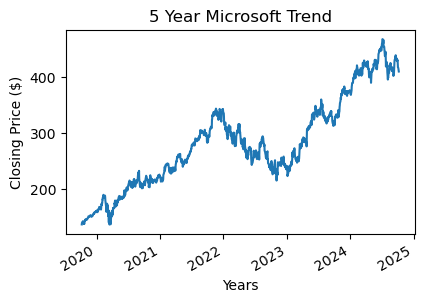

In [110]:
# Plot historical trends of the 3 tech stocks, along with calculating mean & standard deviation
# Microsoft 5 year trend

merged_df['msft_close'].plot(figsize=(4.5,3),title="5 Year Microsoft Trend", xlabel='Years', ylabel='Closing Price ($)')
plt.savefig('Resources/msft5yr.png')
plt.show()

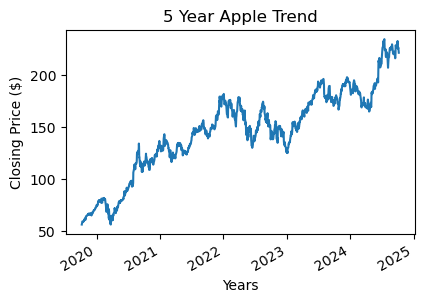

In [111]:
# Plot historical trends of the 3 tech stocks, along with calculating mean & standard deviation (see pg 7 of the powerpoint)
# Apple 5 year trend

merged_df['aapl_close'].plot(figsize=(4.5,3),title="5 Year Apple Trend", xlabel='Years', ylabel='Closing Price ($)')
plt.savefig('Resources/aapl5yr.png')


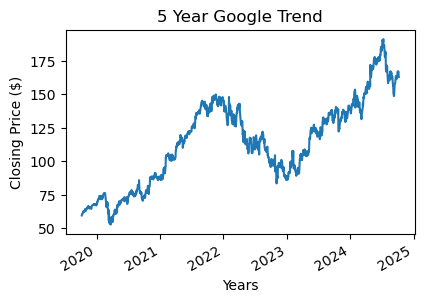

In [112]:
# Plot historical trends of the 3 tech stocks, along with calculating mean & standard deviation (see pg 7 of the powerpoint)
# Google 5 year trend

merged_df['googl_close'].plot(figsize=(4.5,3),title="5 Year Google Trend", xlabel='Years', ylabel='Closing Price ($)')
plt.savefig('Resources/googl5yr.png')


Text(0.5, 1.0, '5 Year Stock Trend of Apple, Google and Microsoft')

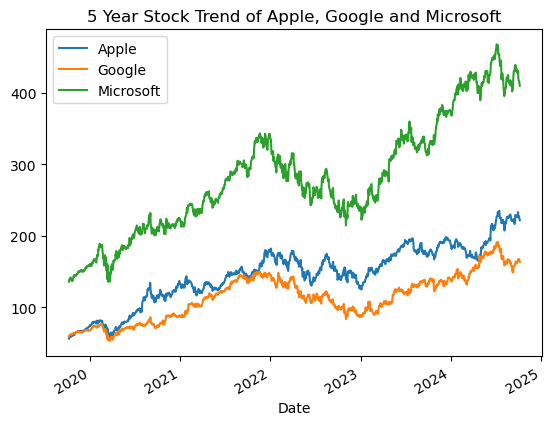

In [113]:
# Plot historical trends of the 3 tech stocks, along with calculating mean & standard deviation (see pg 7 of the powerpoint)

merged_df['aapl_close' ].plot(label= "Apple")
merged_df['googl_close'].plot(label= 'Google')
merged_df['msft_close'].plot(label='Microsoft')
plt.legend()
plt.title('5 Year Stock Trend of Apple, Google and Microsoft')


In [114]:
# Plot historical trends of the 3 tech stocks, along with calculating mean & standard deviation (see pg 7 of the powerpoint)
# calculate mean & standard deviation

merged_df.describe()

,msft_close,aapl_close,googl_close,comp_close,spx_close
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,281.252258,146.065413,113.876359,12907.457576,4127.005079
std,80.222572,41.330858,31.746797,2540.924738,710.477256
min,135.420000,56.090000,52.710000,6860.670000,2237.400000
25%,222.630000,124.372500,88.090000,11150.130000,3692.277500
50%,272.355000,149.125000,115.345000,13117.800000,4146.545000
75%,331.815000,174.597500,137.625000,14662.875000,4519.332500
max,467.560000,234.820000,191.180000,18647.450000,5762.480000


In [115]:
# Plot correlation of stocks; drill into 2024 performance, filter out 2024

df_2024 = merged_df[merged_df.index.year == 2024]
display(df_2024.head())
display(df_2024.tail())
merged_df.info()


,msft_close,aapl_close,googl_close,comp_close,spx_close
Date,,,,,
2024-01-02,370.87,185.64,138.17,14765.94,4742.83
2024-01-03,370.60,184.25,138.92,14592.21,4704.81
2024-01-04,367.94,181.91,136.39,14510.30,4688.68
2024-01-05,367.75,181.18,135.73,14524.07,4697.24
2024-01-08,374.69,185.56,138.84,14843.77,4763.54


,msft_close,aapl_close,googl_close,comp_close,spx_close
Date,,,,,
2024-10-01,420.69,226.21,166.99,17910.36,5708.75
2024-10-02,417.13,226.78,165.86,17925.12,5709.54
2024-10-03,416.54,225.67,165.86,17918.48,5699.94
2024-10-04,416.06,226.80,167.06,18137.85,5751.07
2024-10-07,409.54,221.69,162.98,17923.90,5695.94


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-10-08 to 2024-10-07
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   msft_close   1258 non-null   float64
 1   aapl_close   1258 non-null   float64
 2   googl_close  1258 non-null   float64
 3   comp_close   1258 non-null   float64
 4   spx_close    1258 non-null   float64
dtypes: float64(5)
memory usage: 59.0 KB


<Axes: title={'center': '2024 Stock and Index Performance'}, xlabel='Date'>

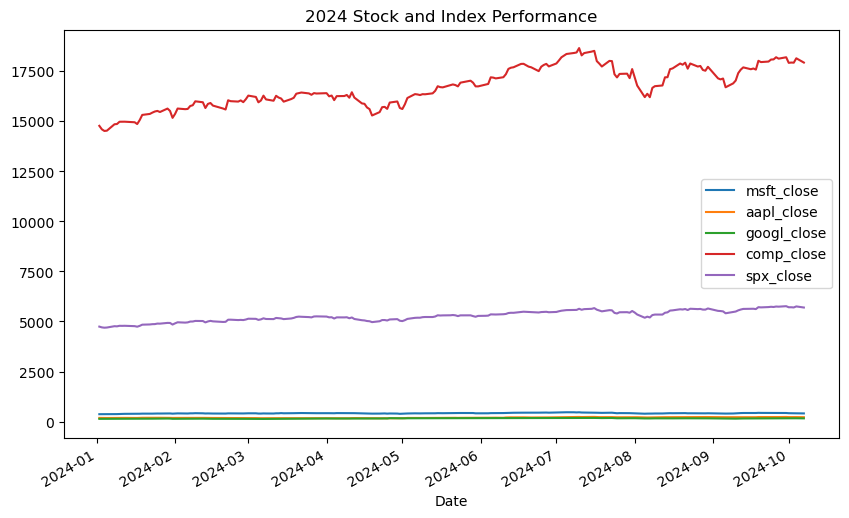

In [116]:
# Let's plot

df_2024[['msft_close', 'aapl_close', 'googl_close', 'comp_close', 'spx_close']].plot(figsize=(10,6), title='2024 Stock and Index Performance')


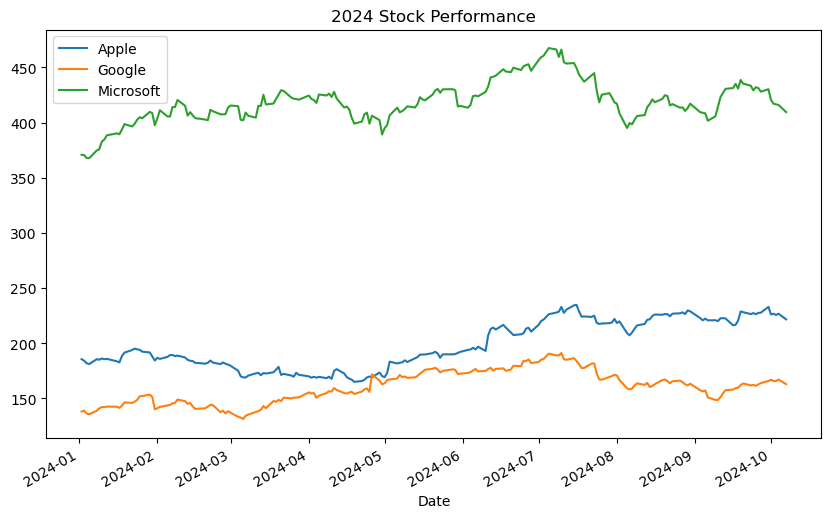

In [117]:
# Let's plot it without the indexes

df_2024['aapl_close'].plot(figsize=(10,6), label= "Apple")
df_2024['googl_close' ].plot(figsize=(10,6), label= "Google")
df_2024['msft_close' ].plot(figsize=(10,6),label= "Microsoft")
plt.legend()
plt.title('2024 Stock Performance')

plt.savefig('Resources/StockPerformance2024.png')


,msft_close,aapl_close,googl_close,comp_close,spx_close
Date,,,,,
2024-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2024-01-03,0.999272,0.992512,1.005428,0.988234,0.991984
2024-01-04,0.992100,0.979907,0.987117,0.982687,0.988583
2024-01-05,0.991587,0.975975,0.982341,0.983620,0.990388
2024-01-08,1.010300,0.999569,1.004849,1.005271,1.004367
...,...,...,...,...,...
2024-10-01,1.134333,1.218541,1.208584,1.212951,1.203659
2024-10-02,1.124734,1.221612,1.200405,1.213950,1.203826
2024-10-03,1.123143,1.215632,1.200405,1.213501,1.201801


<Axes: title={'center': '2024 Normalized Stock and Index Performance'}, xlabel='Date'>

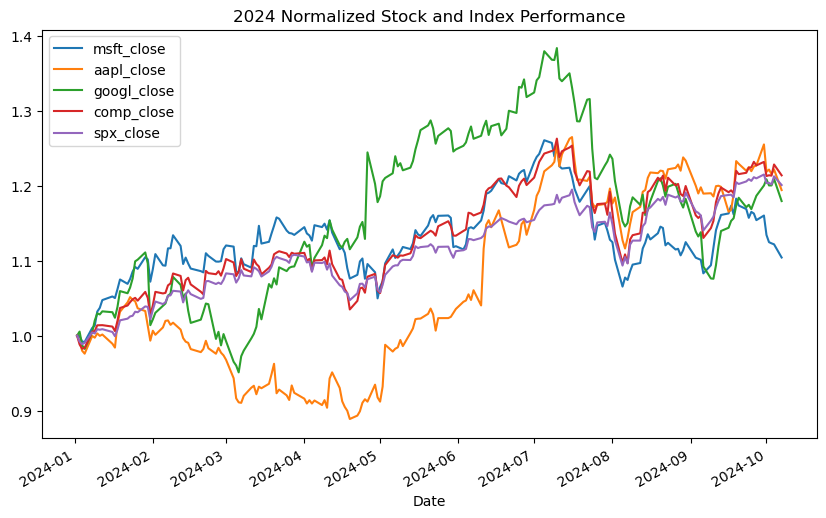

In [118]:
# Let's normalize the data
# Let's normalize the data to the beginning of the year by dividing the first value in each column

df_2024_normalized = df_2024[['msft_close', 'aapl_close', 'googl_close', 'comp_close', 'spx_close']].apply(lambda x: x / x.iloc[0])
display(df_2024_normalized)

# Plot the data
df_2024_normalized.plot(figsize=(10,6), title='2024 Normalized Stock and Index Performance')


,msft_close,aapl_close,googl_close
Date,,,
2024-01-02,1.000000,1.000000,1.000000
2024-01-03,0.999272,0.992512,1.005428
2024-01-04,0.992100,0.979907,0.987117
2024-01-05,0.991587,0.975975,0.982341
2024-01-08,1.010300,0.999569,1.004849
...,...,...,...
2024-10-01,1.134333,1.218541,1.208584
2024-10-02,1.124734,1.221612,1.200405
2024-10-03,1.123143,1.215632,1.200405


<Axes: title={'center': '2024 Normalized Stock Performance'}, xlabel='Date'>

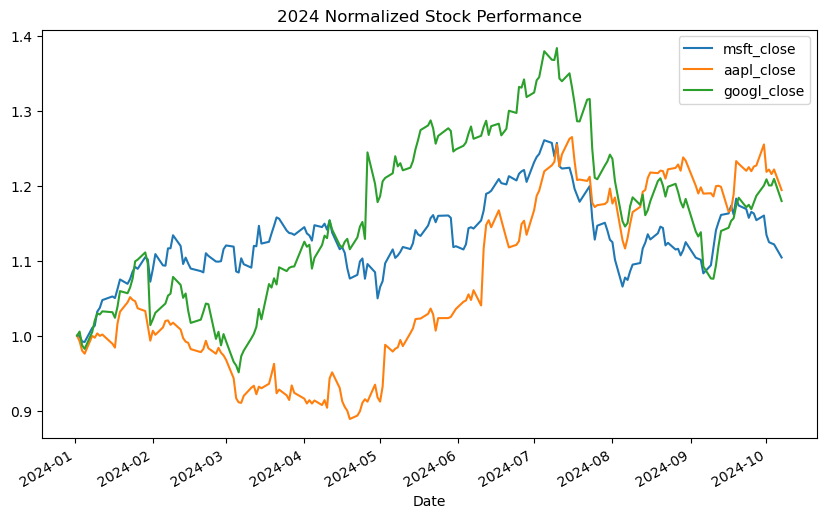

In [119]:
# Let's normalize the data for stocks only
# Let's normalize the data to the beginning of the year by dividing the first value in each column

df_2024_normalized_stocks = df_2024[['msft_close', 'aapl_close', 'googl_close']].apply(lambda x: x / x.iloc[0])
display(df_2024_normalized_stocks)

# Plot the data
df_2024_normalized_stocks.plot(figsize=(10,6), title='2024 Normalized Stock Performance')


,msft_close,aapl_close,googl_close
Date,,,
2024-01-02,NaN,NaN,NaN
2024-01-03,-0.000728,-0.007488,0.005428
2024-01-04,-0.007178,-0.012700,-0.018212
2024-01-05,-0.000516,-0.004013,-0.004839
2024-01-08,0.018872,0.024175,0.022913
...,...,...,...
2024-10-01,-0.022333,-0.029142,0.006874
2024-10-02,-0.008462,0.002520,-0.006767
2024-10-03,-0.001414,-0.004895,0.000000


<Axes: title={'center': 'Daily Percentage Returns of Microsoft, Apple, and Google in 2024'}, xlabel='Date'>

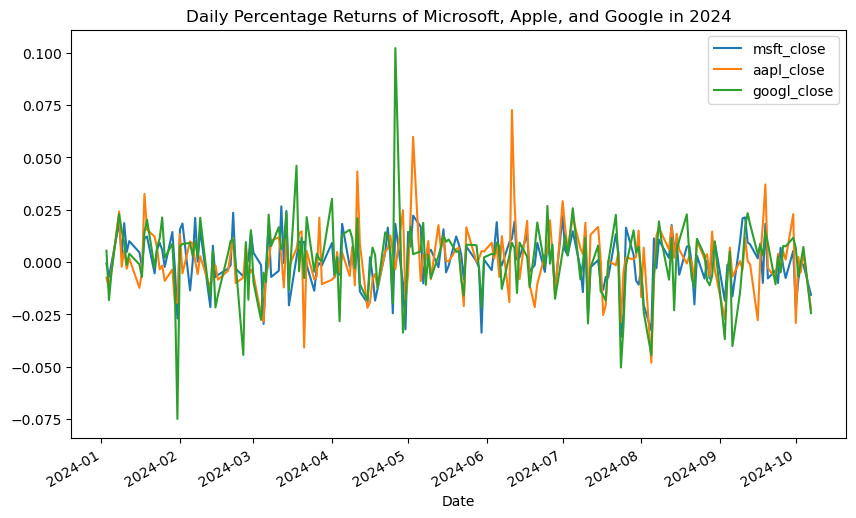

In [120]:
# Let's analyze the data
# Calculate daily percentage returns for the stocks and plot it

df_2024_returns = df_2024[['msft_close', 'aapl_close', 'googl_close']].pct_change()
display(df_2024_returns)
df_2024_returns.plot(figsize=(10, 6), title='Daily Percentage Returns of Microsoft, Apple, and Google in 2024')


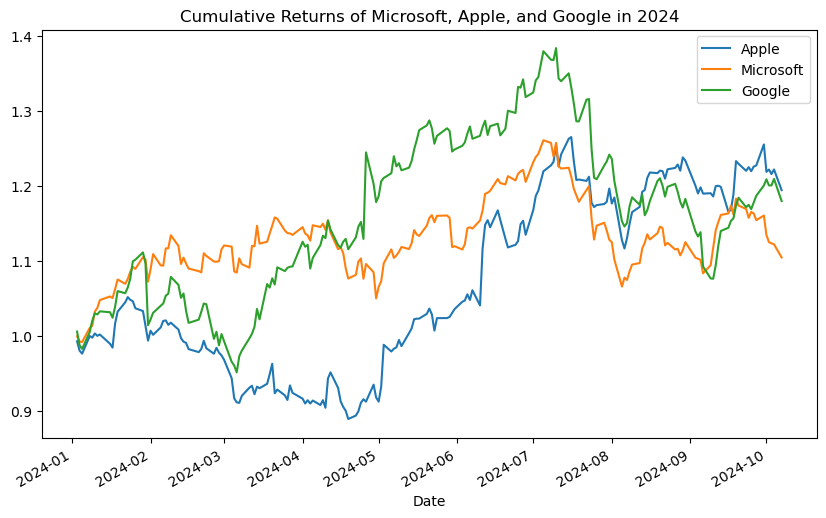

In [121]:
# Analyze the data
# Calculate cumulative returns to see overall performance growth

df_2024_cumulative = (1 + df_2024_returns).cumprod()

df_2024_cumulative['aapl_close'].plot(figsize=(10,6),label='Apple')
df_2024_cumulative['msft_close'].plot(figsize=(10,6),label='Microsoft')
df_2024_cumulative['googl_close'].plot(figsize=(10,6),label='Google')

plt.legend()
plt.title('Cumulative Returns of Microsoft, Apple, and Google in 2024')
plt.savefig('Resources/cumulativereturns.png')

# df_2024_cumulative.plot(figsize=(10,6), title='Cumulative Returns of Microsoft, Apple, and Google in 2024')
# df_2024_cumulative = (1 + df_2024_returns).cumprod()
# plt.savefig('Resources/cumulativereturns.png')

# Research about this function:
# """
# The .cumprod() function in pandas calculates 
# the cumulative product of a series. 
# It's often used in finance to calculate cumulative 
# returns by multiplying daily returns over time.

# For example, if a stock grows 5% on Day 1 and 2% 
# on Day 2, .cumprod() multiplies these growth 
# factors (1.05 * 1.02) to show cumulative growth. 
# It tracks how much an investment increases or 
# decreases over time, assuming all returns 
# are reinvested.

# In short, .cumprod() is useful for analyzing 
# cumulative growth, especially for investment returns.
# """


In [122]:
# Calculate correlation between the three stocks
# Correlation index

correlation_matrix = df_2024_returns.corr()

print("Correlation Matrix:")
print(correlation_matrix)
correlation_matrix.to_csv("Resources/correlation_matrix.csv", index=True)


Correlation Matrix:
             msft_close  aapl_close  googl_close
msft_close     1.000000    0.461353     0.611729
aapl_close     0.461353    1.000000     0.390037
googl_close    0.611729    0.390037     1.000000



**Summary:  The correlation matrix shows how the daily returns of Microsoft, Apple, and Google relate to each other in 2024:**

- **Microsoft and Apple (0.46)**: There’s a moderate positive relationship, meaning they sometimes move in the same direction but not strongly aligned.
- **Microsoft and Google (0.61)**: A stronger positive relationship, indicating that their returns tend to move together more often.
- **Apple and Google (0.39)**: A weak positive relationship, showing that their returns are relatively independent.

### Summary:
- **Microsoft and Google** are the most aligned.
- **Apple** is more independent, with weaker correlations to both Microsoft and Google.


In [123]:
# Forecast/Predict stock trends of Apple (see pg 9 of powerpoint)

# Make new dataframe with only relevant columns
aapl_prophet = merged_df.drop(['msft_close', 'googl_close', 'comp_close', 'spx_close'], axis=1)

# Make new dataframe with AAPL data and reset index
aapl_prophet = aapl_prophet.reset_index()

# Rename column names to match Prophet format
aapl_prophet.columns = ["ds", "y"]

# Drop any rows without data
aapl_prophet = aapl_prophet.dropna()

#Preview first and last rows
display(aapl_prophet)



,ds,y
0,2019-10-08,56.10
1,2019-10-09,56.76
2,2019-10-10,57.52
3,2019-10-11,59.05
4,2019-10-14,58.97
...,...,...
1253,2024-10-01,226.21
1254,2024-10-02,226.78
1255,2024-10-03,225.67
1256,2024-10-04,226.80


In [124]:
# Call Prophet function - beginning of Apple forecast
aapl_trends = Prophet(weekly_seasonality=False) # Seasonality ignores the weekend where there is no trading activity

# Fit appl series time series
aapl_trends.fit(aapl_prophet)

# Make new dataframe with predictions 90 days in the future, preview first and last rows
future_aapl_trends = aapl_trends.make_future_dataframe(periods=90)
future_aapl_trends = future_aapl_trends[future_aapl_trends['ds'].dt.weekday < 5]
display(future_aapl_trends)



09:45:06 - cmdstanpy - INFO - Chain [1] start processing
09:45:07 - cmdstanpy - INFO - Chain [1] done processing


,ds
0,2019-10-08
1,2019-10-09
2,2019-10-10
3,2019-10-11
4,2019-10-14
...,...
1341,2024-12-30
1342,2024-12-31
1343,2025-01-01
1344,2025-01-02


In [125]:
# Make predictions in future dataframe, preview first and last rows
forecast_aapl_trends = aapl_trends.predict(future_aapl_trends)
display(forecast_aapl_trends)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-10-08,56.501214,49.852004,66.933464,56.501214,56.501214,2.188653,2.188653,2.188653,2.188653,2.188653,2.188653,0.0,0.0,0.0,58.689867
1,2019-10-09,56.639375,49.255433,68.075550,56.639375,56.639375,2.116162,2.116162,2.116162,2.116162,2.116162,2.116162,0.0,0.0,0.0,58.755536
2,2019-10-10,56.777535,49.707629,67.018282,56.777535,56.777535,2.033333,2.033333,2.033333,2.033333,2.033333,2.033333,0.0,0.0,0.0,58.810868
3,2019-10-11,56.915696,50.356439,67.559182,56.915696,56.915696,1.940622,1.940622,1.940622,1.940622,1.940622,1.940622,0.0,0.0,0.0,58.856318
4,2019-10-14,57.330178,49.998559,67.152404,57.330178,57.330178,1.614970,1.614970,1.614970,1.614970,1.614970,1.614970,0.0,0.0,0.0,58.945148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,2024-12-30,228.967083,222.890537,244.493006,224.435289,233.766181,4.311468,4.311468,4.311468,4.311468,4.311468,4.311468,0.0,0.0,0.0,233.278551
1318,2024-12-31,229.092850,222.829006,243.697642,224.476613,233.979307,3.993232,3.993232,3.993232,3.993232,3.993232,3.993232,0.0,0.0,0.0,233.086082
1319,2025-01-01,229.218616,223.258144,243.822009,224.443999,234.313079,3.677604,3.677604,3.677604,3.677604,3.677604,3.677604,0.0,0.0,0.0,232.896220
1320,2025-01-02,229.344382,222.216832,243.574474,224.469604,234.622582,3.368056,3.368056,3.368056,3.368056,3.368056,3.368056,0.0,0.0,0.0,232.712438


/Users/mariannemittelstadt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/mariannemittelstadt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


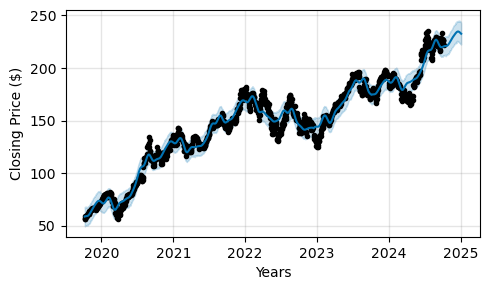

In [126]:
# Graph the prophet predictions
fig1 = aapl_trends.plot(forecast_aapl_trends, figsize=(5,3),xlabel='Years',ylabel='Closing Price ($)')
plt.savefig('Resources/appleforecast.png')


In [127]:
# Set the index future dataframe to the ds datetime column
forecast_aapl_trends = forecast_aapl_trends.set_index('ds')

# View the yhat, yhat_lower, yhat_upper columns in future dataframe
forecast_aapl_trends[['yhat', 'yhat_lower', 'yhat_upper']].head()


,yhat,yhat_lower,yhat_upper
ds,,,
2019-10-08,58.689867,49.852004,66.933464
2019-10-09,58.755536,49.255433,68.075550
2019-10-10,58.810868,49.707629,67.018282
2019-10-11,58.856318,50.356439,67.559182
2019-10-14,58.945148,49.998559,67.152404


<Axes: xlabel='ds'>

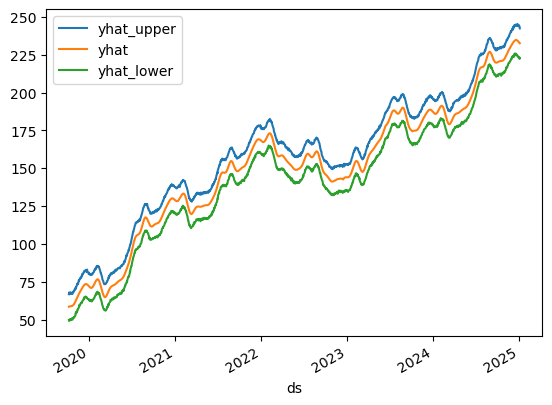

In [128]:
# Graph the last 5 entries in future dataframe yhat, yhat_lower, yhat_upper columns 
forecast_aapl_trends[['yhat_upper', 'yhat', 'yhat_lower']].plot()


/Users/mariannemittelstadt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/mariannemittelstadt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/mariannemittelstadt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Serie

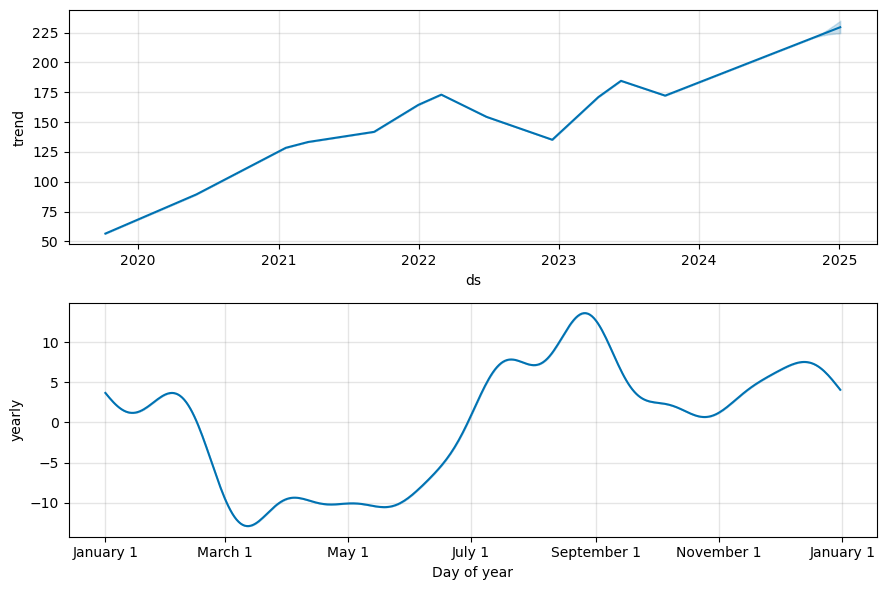

In [129]:
# Reset the index in the forecast_aapl_trends DataFrame
forecast_aapl_trends = forecast_aapl_trends.reset_index()

# visualize the forecast results for the forecast_aapl_trends dataFrame
fig2 = aapl_trends.plot_components(forecast_aapl_trends)


In [130]:
# Forecast/Predict stock trends of Microsoft (see pg 9 of powerpoint)
#drop extra columns by index
#data.drop(['one', 'two'], axis=1)
prophet_msft_df = merged_df.drop(['aapl_close', 'googl_close', 'comp_close', 'spx_close'], axis=1)

### reset the index
prophet_msft_df = prophet_msft_df.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
prophet_msft_df.columns = ["ds", "y"]

### Drop an NaN values from the prophet_msft_df DataFrame
prophet_msft_df = prophet_msft_df.dropna()

# View the first and last five rows of the msft_prophet_df DataFrame
display(prophet_msft_df)

,ds,y
0,2019-10-08,135.67
1,2019-10-09,138.24
2,2019-10-10,139.10
3,2019-10-11,139.68
4,2019-10-14,139.55
...,...,...
1253,2024-10-01,420.69
1254,2024-10-02,417.13
1255,2024-10-03,416.54
1256,2024-10-04,416.06


In [131]:
# MSFT
# Call the Prophet function, store as an object
m = Prophet(weekly_seasonality=False) #Seasonality ignores weekend where there is no trading activity
m

In [132]:
# MSFT
# Fit the time-series model
m.fit(prophet_msft_df)


09:45:08 - cmdstanpy - INFO - Chain [1] start processing
09:45:09 - cmdstanpy - INFO - Chain [1] done processing


In [133]:
# MSFT
# Create a future dataframe to hold predictions
# How far?????????????????????????????
#
# future_msft_trends = m.make_future_dataframe(periods=90, freq='day')
future_msft_trends = m.make_future_dataframe(periods=90)
future_msft_trends = future_msft_trends[future_msft_trends['ds'].dt.weekday < 5]

# future_msft_trends.tail()
display(future_msft_trends.head(10))
display(future_msft_trends.tail(10))

,ds
0,2019-10-08
1,2019-10-09
2,2019-10-10
3,2019-10-11
4,2019-10-14
5,2019-10-15
6,2019-10-16
7,2019-10-17
8,2019-10-18
9,2019-10-21


,ds
1334,2024-12-23
1335,2024-12-24
1336,2024-12-25
1337,2024-12-26
1338,2024-12-27
1341,2024-12-30
1342,2024-12-31
1343,2025-01-01
1344,2025-01-02
1345,2025-01-03


In [134]:
# MSFT
# Make the predictions for the trend data
forecast_msft_trends = m.predict(future_msft_trends)

# Display the first five rows of the forecast_msft_trends DataFrame
forecast_msft_trends.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-10-08,154.514553,117.088017,144.524219,154.514553,154.514553,-22.819048,-22.819048,-22.819048,-22.819048,-22.819048,-22.819048,0.0,0.0,0.0,131.695506
1,2019-10-09,154.546907,118.814468,145.398511,154.546907,154.546907,-22.569059,-22.569059,-22.569059,-22.569059,-22.569059,-22.569059,0.0,0.0,0.0,131.977848
2,2019-10-10,154.579260,118.176204,144.997618,154.579260,154.579260,-22.298687,-22.298687,-22.298687,-22.298687,-22.298687,-22.298687,0.0,0.0,0.0,132.280572
3,2019-10-11,154.611613,119.097017,145.010527,154.611613,154.611613,-22.012007,-22.012007,-22.012007,-22.012007,-22.012007,-22.012007,0.0,0.0,0.0,132.599606
4,2019-10-14,154.708673,118.723147,146.433273,154.708673,154.708673,-21.088166,-21.088166,-21.088166,-21.088166,-21.088166,-21.088166,0.0,0.0,0.0,133.620507


/Users/mariannemittelstadt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/mariannemittelstadt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


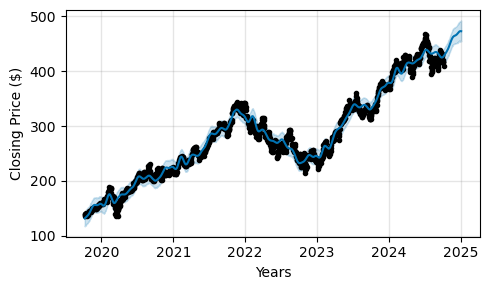

In [135]:
# MSFT
# Plot the Prophet predictions for the MSFT trends data

m.plot(forecast_msft_trends,figsize=(5,3),xlabel='Years',ylabel='Closing Price ($)');
plt.savefig('Resources/microsoftforecast.png')


In [136]:
# MSFT
# Set the index in the forecast_msft_trends DataFrame to the ds datetime column

forecast_msft_trends = forecast_msft_trends.set_index('ds')


# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
forecast_msft_trends[['yhat', 'yhat_lower', 'yhat_upper']].head()


,yhat,yhat_lower,yhat_upper
ds,,,
2019-10-08,131.695506,117.088017,144.524219
2019-10-09,131.977848,118.814468,145.398511
2019-10-10,132.280572,118.176204,144.997618
2019-10-11,132.599606,119.097017,145.010527
2019-10-14,133.620507,118.723147,146.433273


/Users/mariannemittelstadt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/mariannemittelstadt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/mariannemittelstadt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Serie

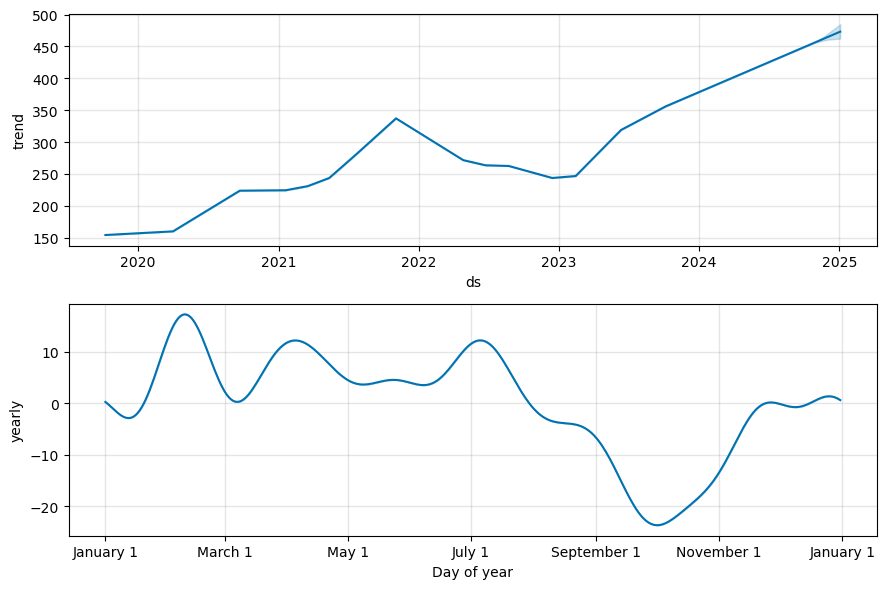

In [137]:
# MSFT
# Reset the index in the forecast_msft_trends DataFrame

forecast_msft_trends = forecast_msft_trends.reset_index()

# Use the plot_components function to visualize the forecast results
# for the forecast_msft_trends DataFrame
m.plot_components(forecast_msft_trends);
plt.savefig('Resources/microsoftforecastcomponents.png')


In [138]:
# Forecast/Predict stock trends of Google (see pg 9 of powerpoint)
# Filter merged_df for Google only
merged_df_google = pd.DataFrame(merged_df['googl_close'])

# # reset index
merged_df_google = merged_df_google.reset_index()

merged_df_google.tail()


,Date,googl_close
1253,2024-10-01,166.99
1254,2024-10-02,165.86
1255,2024-10-03,165.86
1256,2024-10-04,167.06
1257,2024-10-07,162.98


In [139]:
# Use Prophet to forecast 90 days 
# Rename columns for Prophet forecasting
merged_df_google = merged_df_google.rename(columns={'Date':'ds', 'googl_close':'y'})
# merged_df_google.head()

# Create model
model = Prophet(weekly_seasonality=False)
# fit model
model.fit(merged_df_google)

# Create dataframe for predictions
google_predict_df = model.make_future_dataframe(periods=90)
google_predict_df = google_predict_df[google_predict_df['ds'].dt.weekday < 5]
# display(google_predict_df).head()
# display(google_predict_df).tail()

# Populate dataframe with predictions
google_forecast_trends = model.predict(google_predict_df)
display(google_forecast_trends.head())
display(google_forecast_trends.tail())


09:45:10 - cmdstanpy - INFO - Chain [1] start processing
09:45:10 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-10-08,70.079132,59.358143,73.028403,70.079132,70.079132,-3.876535,-3.876535,-3.876535,-3.876535,-3.876535,-3.876535,0.0,0.0,0.0,66.202597
1,2019-10-09,70.058594,59.092253,73.501886,70.058594,70.058594,-3.800900,-3.800900,-3.800900,-3.800900,-3.800900,-3.800900,0.0,0.0,0.0,66.257694
2,2019-10-10,70.038057,59.077184,72.734335,70.038057,70.038057,-3.740243,-3.740243,-3.740243,-3.740243,-3.740243,-3.740243,0.0,0.0,0.0,66.297814
3,2019-10-11,70.017519,59.437063,73.582573,70.017519,70.017519,-3.696922,-3.696922,-3.696922,-3.696922,-3.696922,-3.696922,0.0,0.0,0.0,66.320597
4,2019-10-14,69.955906,59.134186,73.677673,69.955906,69.955906,-3.685937,-3.685937,-3.685937,-3.685937,-3.685937,-3.685937,0.0,0.0,0.0,66.269969


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1317,2024-12-30,182.802456,171.507378,186.592022,180.141301,185.505473,-3.845470,-3.845470,-3.845470,-3.845470,-3.845470,-3.845470,0.0,0.0,0.0,178.956985
1318,2024-12-31,182.909621,170.974777,186.919565,180.180862,185.665275,-3.871721,-3.871721,-3.871721,-3.871721,-3.871721,-3.871721,0.0,0.0,0.0,179.037899
1319,2025-01-01,183.016786,171.163470,187.434779,180.212254,185.822865,-3.904260,-3.904260,-3.904260,-3.904260,-3.904260,-3.904260,0.0,0.0,0.0,179.112526
1320,2025-01-02,183.123951,171.585586,187.023852,180.241482,185.998455,-3.941720,-3.941720,-3.941720,-3.941720,-3.941720,-3.941720,0.0,0.0,0.0,179.182231
1321,2025-01-03,183.231116,171.862998,188.045447,180.270641,186.177642,-3.982297,-3.982297,-3.982297,-3.982297,-3.982297,-3.982297,0.0,0.0,0.0,179.248819


/Users/mariannemittelstadt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/mariannemittelstadt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


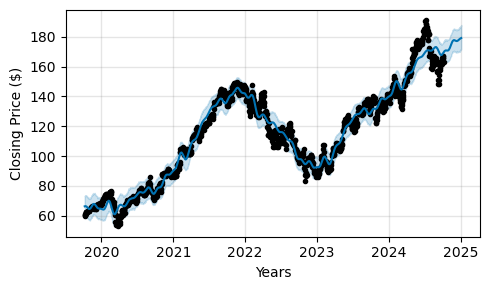

In [140]:
# Plot the model predictions
fig = model.plot(google_forecast_trends,figsize=(5,3),xlabel='Years',ylabel='Closing Price ($)');
# ax = fig.gca()
# ax.set_title('Google 90 Day Forecast')
plt.savefig('Resources/googlepredict.png')

In [141]:
# Review model predictions and calculate expected growth
# google_forecast_trends.head()
# google_forecast_trends[['ds','yhat']]
g_prediction_filter_01032025 = google_forecast_trends.loc[(google_forecast_trends['ds'] == '2025-01-03')]
g_yhat_01032025 = g_prediction_filter_01032025.iloc[0, g_prediction_filter_01032025.columns.get_loc('yhat')]

g_prediction_filter_10082024 = google_forecast_trends.loc[(google_forecast_trends['ds'] == '2024-10-08')]
g_yhat_10082024 = g_prediction_filter_10082024.iloc[0, g_prediction_filter_10082024.columns.get_loc('yhat')]

g_growth = g_yhat_01032025 - g_yhat_10082024
g_growthpercent = g_growth / g_yhat_10082024
g_growthpercent
print(f'Expected growth for Google is: {g_growthpercent * 100:.4} % over the next 90 days')

Expected growth for Google is: 5.385 % over the next 90 days


In [142]:
# Perform the same analysis for MSFT - Mark & Marianne

m_prediction_filter_01032025 = forecast_msft_trends.loc[(forecast_msft_trends['ds'] == '2025-01-03')]
m_yhat_01032025 = m_prediction_filter_01032025.iloc[0, m_prediction_filter_01032025.columns.get_loc('yhat')]

m_prediction_filter_10082024 = forecast_msft_trends.loc[(forecast_msft_trends['ds'] == '2024-10-08')]
m_yhat_10082024 = m_prediction_filter_10082024.iloc[0, m_prediction_filter_10082024.columns.get_loc('yhat')]

m_growth = m_yhat_01032025 - m_yhat_10082024
m_growthpercent = m_growth / m_yhat_10082024
m_growthpercent
print(f'Expected growth for Microsoft is: {m_growthpercent * 100:.4} % over the next 90 days')


Expected growth for Microsoft is: 10.42 % over the next 90 days


In [143]:
# Perform the same analysis for AAPL - Mark & Marianne
# forecast_aapl_trends
a_prediction_filter_01032025 = forecast_aapl_trends.loc[(forecast_aapl_trends['ds'] == '2025-01-03')]
a_yhat_01032025 = a_prediction_filter_01032025.iloc[0, a_prediction_filter_01032025.columns.get_loc('yhat')]

a_prediction_filter_10082024 = forecast_aapl_trends.loc[(forecast_aapl_trends['ds'] == '2024-10-08')]
a_yhat_10082024 = a_prediction_filter_10082024.iloc[0, a_prediction_filter_10082024.columns.get_loc('yhat')]

a_growth = a_yhat_01032025 - a_yhat_10082024
a_growthpercent = a_growth / a_yhat_10082024
a_growthpercent
print(f'Expected growth for Apple is: {a_growthpercent * 100:.4} % over the next 90 days')


Expected growth for Apple is: 5.381 % over the next 90 days


In [144]:
# Compare the future growth of the 3 stocks
# Backburner; Pete - Plot components of highest performing forecast (pg 10 of powerpoint)

Text(0.5, 1.0, '2024 Index Performance')

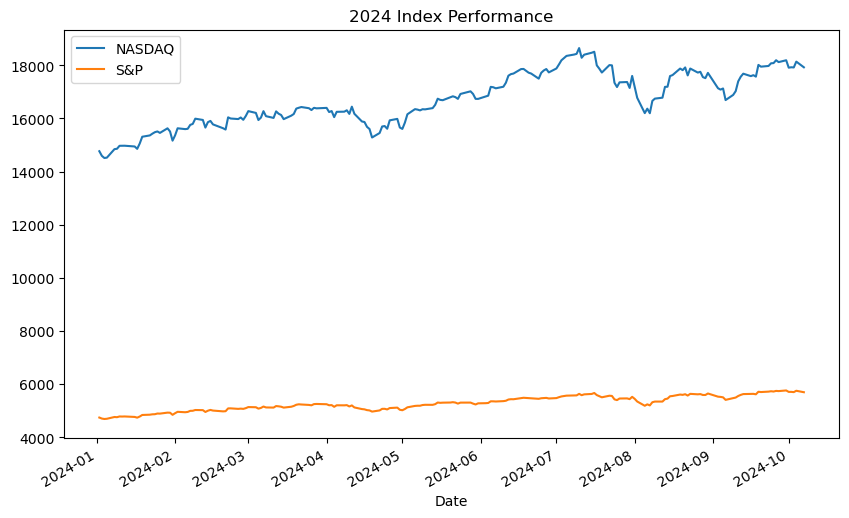

In [145]:
# Compare these tech stocks to the Nasdaq & S&P 500 indices (pg 11 of powerpoint)
# Plot only the two indices:

df_2024['comp_close'].plot(figsize=(10,6), label='NASDAQ')
df_2024['spx_close'].plot(figsize=(10,6), label='S&P')
plt.legend()
plt.title('2024 Index Performance')

# df_2024_indices = df_2024[['comp_close', 'spx_close']].plot(figsize=(10,6), title='2024 Stock and Index Performance')

<Axes: title={'center': '2024 Normalized Stock and Index Performance'}, xlabel='Date'>

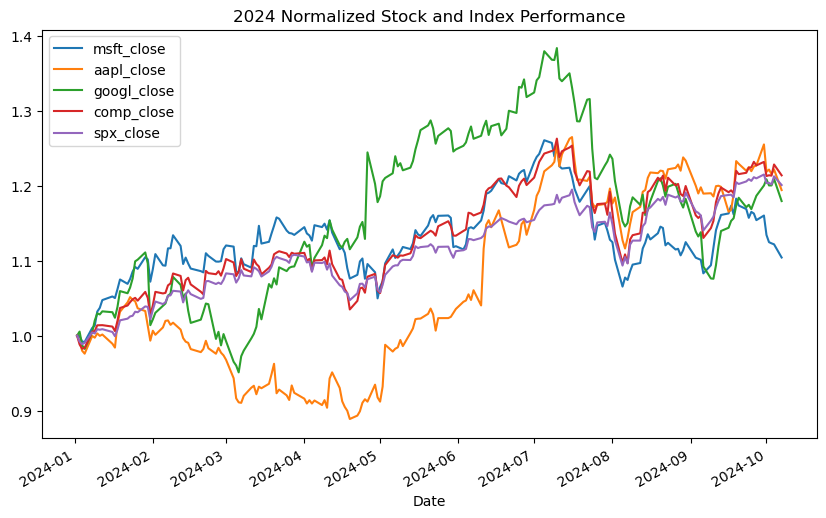

In [146]:
# Plot indices w/ stocks (Pete did this already):

df_2024_normalized.plot(figsize=(10,6), title='2024 Normalized Stock and Index Performance')


<Axes: title={'center': 'Daily Percentage Returns of Microsoft, Apple, Google, NASDAQ & SP500 indices in 2024'}, xlabel='Date'>

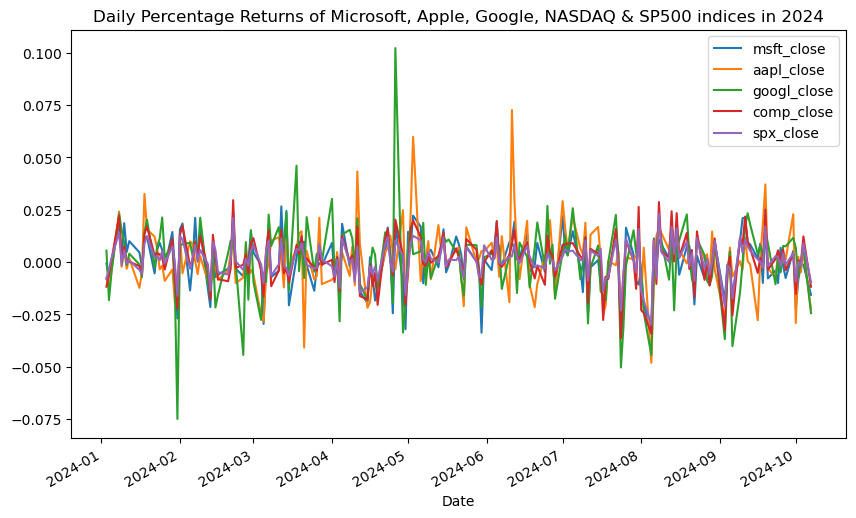

In [147]:
# Calculate daily percentage returns for the stocks and plot it

df_2024_returns_w_indices = df_2024[['msft_close', 'aapl_close', 'googl_close', 'comp_close', 'spx_close']].pct_change()
df_2024_returns_w_indices.plot(figsize=(10, 6), title='Daily Percentage Returns of Microsoft, Apple, Google, NASDAQ & SP500 indices in 2024')


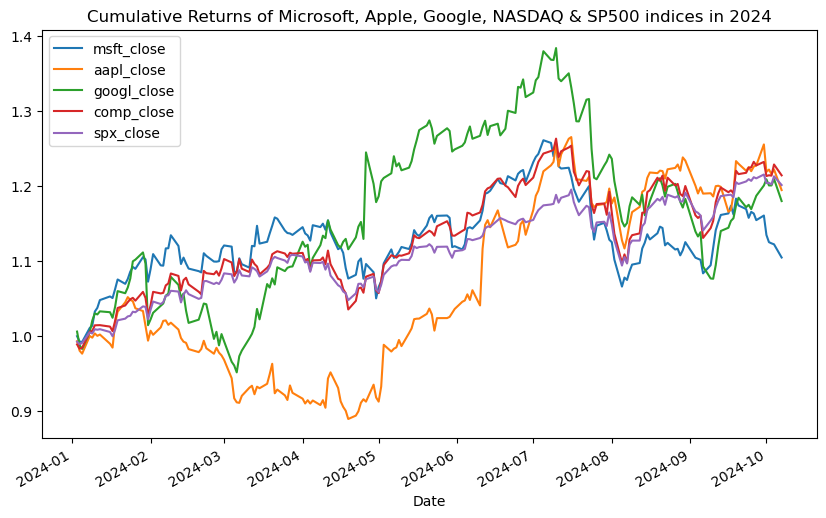

In [148]:
# Calculate cumulative returns to see overall performance growth

df_2024_cumulative_w_indices = (1 + df_2024_returns_w_indices).cumprod()
df_2024_cumulative_w_indices.plot(figsize=(10,6), title='Cumulative Returns of Microsoft, Apple, Google, NASDAQ & SP500 indices in 2024')
df_2024_cumulative_w_indices = (1 + df_2024_returns_w_indices).cumprod()


09:45:13 - cmdstanpy - INFO - Chain [1] start processing
09:45:13 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/7b/r_ys9h9s00sgh40ct45vfxtr0000gn/T/ipykernel_22177/3191116575.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nasdaq_predict_df = google_predict_df[nasdaq_predict_df['ds'].dt.weekday < 5]
/Users/mariannemittelstadt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/mariannemittelstadt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an nd

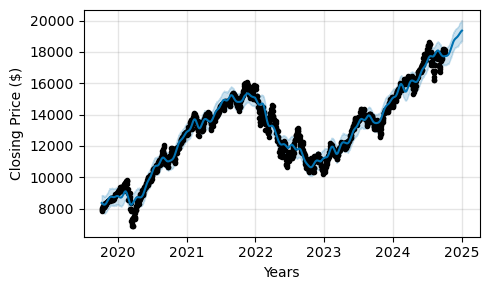

In [149]:
# Forecast/Predict trend of the NASDAQ index 
# Filter merged_df for NASDAQ only
merged_df_nasdaq = pd.DataFrame(merged_df['comp_close'])

# reset index
merged_df_nasdaq = merged_df_nasdaq.reset_index()
merged_df_nasdaq.head()

# use Prophet to forecast 90 days 
# rename columns for Prophet forecasting
merged_df_nasdaq = merged_df_nasdaq.rename(columns={'Date':'ds', 'comp_close':'y'})
#merged_df_nasdaq.head()

# create model
modelN = Prophet(weekly_seasonality=False)
# fit model
modelN.fit(merged_df_nasdaq)

# create dataframe for predictions
nasdaq_predict_df = modelN.make_future_dataframe(periods=90)
nasdaq_predict_df = google_predict_df[nasdaq_predict_df['ds'].dt.weekday < 5]

# display(nasdaq_predict_df).head()
# display(nasdaq_predict_df).tail()

# populate dataframe with predictions
nasdaq_forecast_trends = modelN.predict(nasdaq_predict_df)

#plot the modelN predictions
fig = modelN.plot(nasdaq_forecast_trends,figsize=(5,3),xlabel='Years',ylabel='Closing Price ($)');
plt.savefig('Resources/nasdaqpredict.png')

/Users/mariannemittelstadt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/mariannemittelstadt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/mariannemittelstadt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Serie

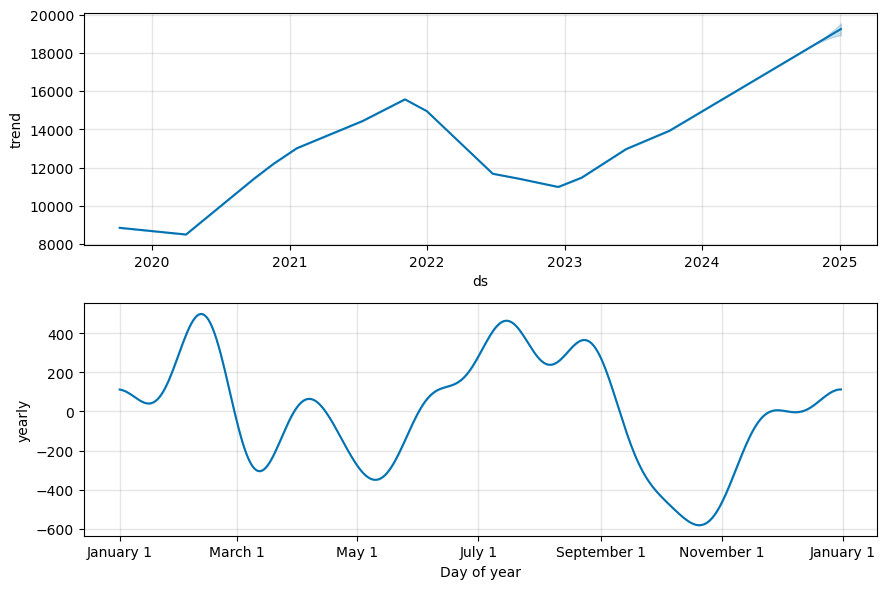

In [150]:
# Nasdaq trends
# Reset the index in the forecast_nasdaq_trends DataFrame
nasdaq_forecast_trends = nasdaq_forecast_trends.reset_index()

# Use the plot_components function to visualize the forecast results
# for the forecast_msft_trends DataFrame
modelN.plot_components(nasdaq_forecast_trends);
plt.savefig('Resources/nasdaqforecastcomponents.png')

09:45:14 - cmdstanpy - INFO - Chain [1] start processing
09:45:15 - cmdstanpy - INFO - Chain [1] done processing
/Users/mariannemittelstadt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/mariannemittelstadt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


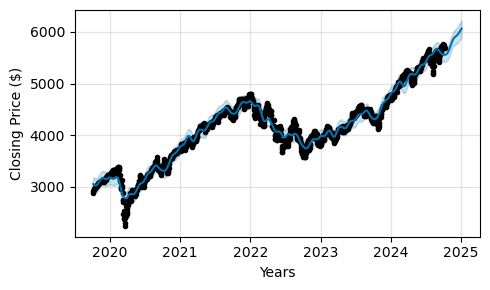

In [151]:
# Forecast/Predict trend of the SP500 index 
# Filter merged_df for the SP500 only
merged_df_sp500 = pd.DataFrame(merged_df['spx_close'])

# reset index
merged_df_sp500 = merged_df_sp500.reset_index()
merged_df_sp500.head()

# use Prophet to forecast 90 days 
# rename columns for Prophet forecasting
merged_df_sp500 = merged_df_sp500.rename(columns={'Date':'ds', 'spx_close':'y'})
#merged_df_spx.head()

# create model
modelS = Prophet(weekly_seasonality=False)
# fit model
modelS.fit(merged_df_sp500)

# create dataframe for predictions
sp500_predict_df = modelS.make_future_dataframe(periods=90)
sp500_predict_df = sp500_predict_df[sp500_predict_df['ds'].dt.weekday < 5]

# display(spx_predict_df).head()
# display(spx_predict_df).tail()

# populate dataframe with predictions
sp500_forecast_trends = modelS.predict(sp500_predict_df)

#plot the modelN predictions
fig = modelS.plot(sp500_forecast_trends,figsize=(5,3),xlabel='Years',ylabel='Closing Price ($)');
plt.savefig('Resources/sp500predict.png')

09:45:16 - cmdstanpy - INFO - Chain [1] start processing
09:45:17 - cmdstanpy - INFO - Chain [1] done processing
/Users/mariannemittelstadt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/mariannemittelstadt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


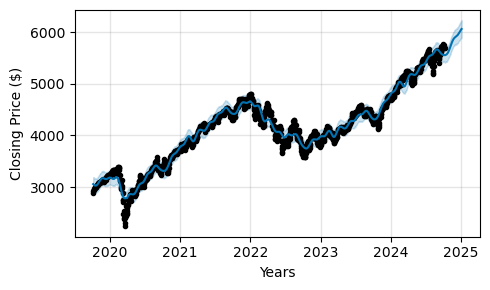

In [152]:
# Forecast/Predict trend of the SP500 index 
# Filter merged_df for the SP500 only
merged_df_sp500 = pd.DataFrame(merged_df['spx_close'])

# reset index
merged_df_sp500 = merged_df_sp500.reset_index()
merged_df_sp500.head()

# use Prophet to forecast 90 days 
# rename columns for Prophet forecasting
merged_df_sp500 = merged_df_sp500.rename(columns={'Date':'ds', 'spx_close':'y'})
#merged_df_spx.head()

# create model
modelS = Prophet(weekly_seasonality=False)
# fit model
modelS.fit(merged_df_sp500)

# create dataframe for predictions
sp500_predict_df = modelS.make_future_dataframe(periods=90)
sp500_predict_df = sp500_predict_df[sp500_predict_df['ds'].dt.weekday < 5]

# display(spx_predict_df).head()
# display(spx_predict_df).tail()

# populate dataframe with predictions
sp500_forecast_trends = modelS.predict(sp500_predict_df)

#plot the modelN predictions
fig = modelS.plot(sp500_forecast_trends,figsize=(5,3),xlabel='Years',ylabel='Closing Price ($)');
plt.savefig('Resources/sp500predict.png')

/Users/mariannemittelstadt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/mariannemittelstadt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/mariannemittelstadt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Serie

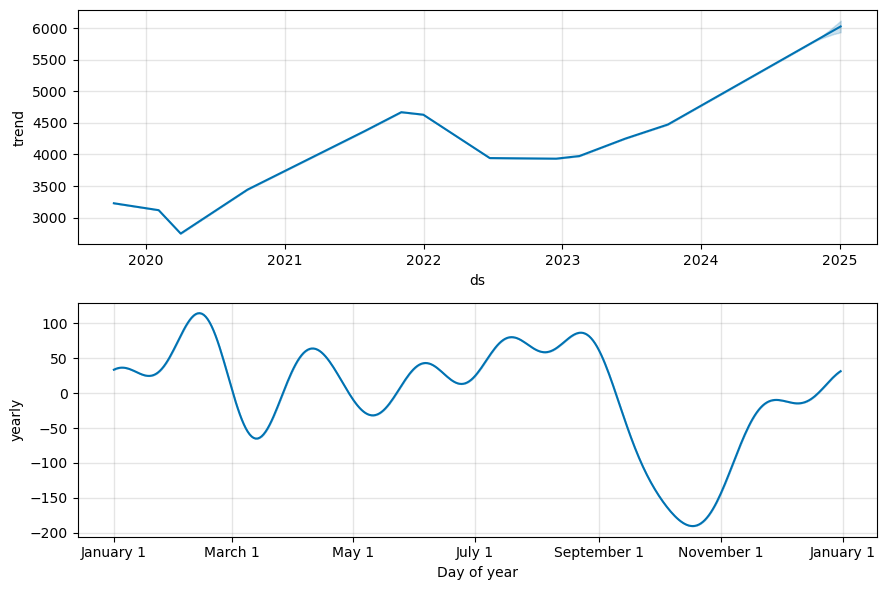

In [153]:
# S&P500 trends
# Reset the index in the forecast_nasdaq_trends DataFrame
sp500_forecast_trends = sp500_forecast_trends.reset_index()

# Use the plot_components function to visualize the forecast results
# for the forecast_msft_trends DataFrame
modelS.plot_components(sp500_forecast_trends);
plt.savefig('Resources/sp500forecastcomponents.png')

In [157]:
# Predicted forecast of SP500 index - Steve
sp500_prediction_filter_01032025 = sp500_forecast_trends.loc[(sp500_forecast_trends['ds'] == '2025-01-03')]
s_yhat_01032025 = sp500_prediction_filter_01032025.iloc[0, sp500_prediction_filter_01032025.columns.get_loc('yhat')]

sp500_prediction_filter_10082024 = sp500_forecast_trends.loc[(sp500_forecast_trends['ds'] == '2024-10-08')]
s_yhat_10082024 = sp500_prediction_filter_10082024.iloc[0, sp500_prediction_filter_10082024.columns.get_loc('yhat')]

sp500_growth = s_yhat_01032025 - s_yhat_10082024
sp500_growthpercent = sp500_growth / s_yhat_10082024
sp500_growthpercent
print(f'Expected growth for the S&P500 index is: {sp500_growthpercent * 100:.2} % over the next 90 days')


Expected growth for the S&P500 index is: 9.1 % over the next 90 days


In [159]:
# Predicted forecast of NASDAQ index
n_prediction_filter_01032025 = nasdaq_forecast_trends.loc[(nasdaq_forecast_trends['ds'] == '2025-01-03')]
n_yhat_01032025 = n_prediction_filter_01032025.iloc[0, n_prediction_filter_01032025.columns.get_loc('yhat')]

n_prediction_filter_10082024 = nasdaq_forecast_trends.loc[(nasdaq_forecast_trends['ds'] == '2024-10-08')]
n_yhat_10082024 = n_prediction_filter_10082024.iloc[0, n_prediction_filter_10082024.columns.get_loc('yhat')]

n_growth = n_yhat_01032025 - n_yhat_10082024
n_growthpercent = n_growth / n_yhat_10082024
n_growthpercent
print(f'Expected growth for the NASDAQ index is: {n_growthpercent * 100:.2} % over the next 90 days')


Expected growth for the NASDAQ index is: 9.2 % over the next 90 days


**Summary:**

The three comparison graphs, above, (Normalized, Daily Percentage Returns & Cumulative Returns) all follow 
similar patterns - all indices & stocks show overall positive growth, but Apple & Google have greater volatility
than Microsoft and NASDAQ and SP500 indices.  Much to our surprise, we learned that the NASDAQ & S&P500 indices 
are predicated to have stronger growth than these three tech stocks.  NASDAQ's expected growth over the next 90 days 
is 9.3% while the S&P500 index is expected to grow 9.2%.  